# Hierarchical Clustering and Gaussian Mixture Models (GMMs)

### 1. Hierarchical Clustering - Hierarchical clustering is a method of cluster analysis that seeks to `build a hierarchy of clusters`. It can be divided into:
- Agglomerative Clustering: A bottom-up approach where each **data point starts in its own cluster**, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive Clustering: A top-down approach where all **data points start in one cluster**, and splits are performed recursively as one moves down the hierarchy.
##### Key Concepts:
- Dendrogram: A tree-like diagram that records the sequences of merges or splits.
- Linkage Criteria: Determines how the distance between clusters is computed (e.g., single-linkage, complete-linkage, average-linkage).

### In this discussion, we will take a look:
- Hierarchical Clustering method and how it works under the hood, by implementing a `single-linkage` clustering mehtod.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Generate random data
np.random.seed(42)
data = np.random.rand(10, 2)  # 10 data points with 2 features

# Calculate the distance matrix
D = squareform(pdist(data, metric='euclidean'))   # pdist - euclidean distance ; squareform - converts this to a symmetric distance matrix.
# print(D)

# Hierarchical clustering function
def hierarchical_clustering(D, threshold):
    clusters = [[i] for i in range(len(D))]  # Each point starts in its own cluster
    while len(clusters) > threshold:
        # Find the closest pair of clusters
        min_dist = float('inf')  #initialize to any large value
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.min([D[p1, p2] for p1 in clusters[i] for p2 in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)
                # print(dist)
                # print(to_merge)
        # Merge clusters
        c1, c2 = to_merge
        clusters[c1] += clusters[c2]
        del clusters[c2]
    return clusters


In [ ]:
D[0, 2]

In [ ]:
# Execute Hierarchical Clustering with a threshold of 3 clusters
clusters = hierarchical_clustering(D, threshold=4)

# Plot the result
colors = ['r', 'g', 'b']
plt.figure()
for i, cluster in enumerate(clusters):
    cluster_points = np.array([data[j] for j in cluster])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)])
    # Add numbering for each data point
    for j in cluster:
        plt.annotate(j, (data[j][0], data[j][1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.title('Hierarchical Clustering Result')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data, method='single')
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

### 2. Gaussian Mixture Models - GMMs are **probabilistic models** that assume all **data points are generated from a mixture of several Gaussian distributions** with unknown parameters.

### 1-D Gaussian Distribution
- A univariate Gaussian distribution is characterized by two parameters: the mean (μ) and the variance (σ^2). 
- The probability density function (PDF) is given by:
$$
p(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$\

- The log-likelihood:
$$
\log L(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \mu)^2
$$

### From here, we try to estimate the Mean (u^) and Variance (σ^2), by maximizing the log-likelihood. (Maximum Likelihood Estimates)


### Multivariate Gaussian - Generalization of a 1-D gaussian distribution, to higher dimensions.
For a **k-dimensional random vector X = (X₁, ..., Xₖ)**, the multivariate Gaussian distribution is defined by two parameters:
- A mean vector μ = (μ₁, ..., μₖ)
- A k × k covariance matrix Σ

$$ p(\mathbf{x}) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu})\right) $$


## Gaussian Mixture Models (GMMs) are an extension of the multivariate Gaussian concept!
- A GMM is a **weighted sum of multiple Gaussian distributions**
- Each Gaussian in the mixture is called a **component** and has its own mean μₖ and covariance matrix Σₖ
- The overall distribution is a weighted sum of these components, where the **weights (πₖ) represent the probability of a data point belonging to that component**
- The **probability density function** of a GMM with K components is: $$ p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \Sigma_k) $$

### The parameters to be estimated and maximize the log-likelihood are `mean μₖ, covariance matrix Σₖv, and mixing coefficients (πₖ)`.
- For this, we use the Expectation-Maximization algorithm.

#### - Expectation - Calculate the **responsibilities**, which represent the probability that data point i belongs to component k.
#### - Maximization - **Update the parameters** using the responsibilities.

#### Iterate E-M steps till changes in log-likelihood or parameters are below a certain threshold.


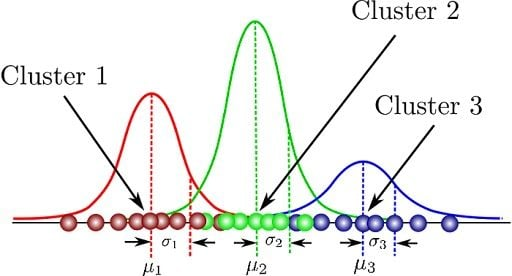

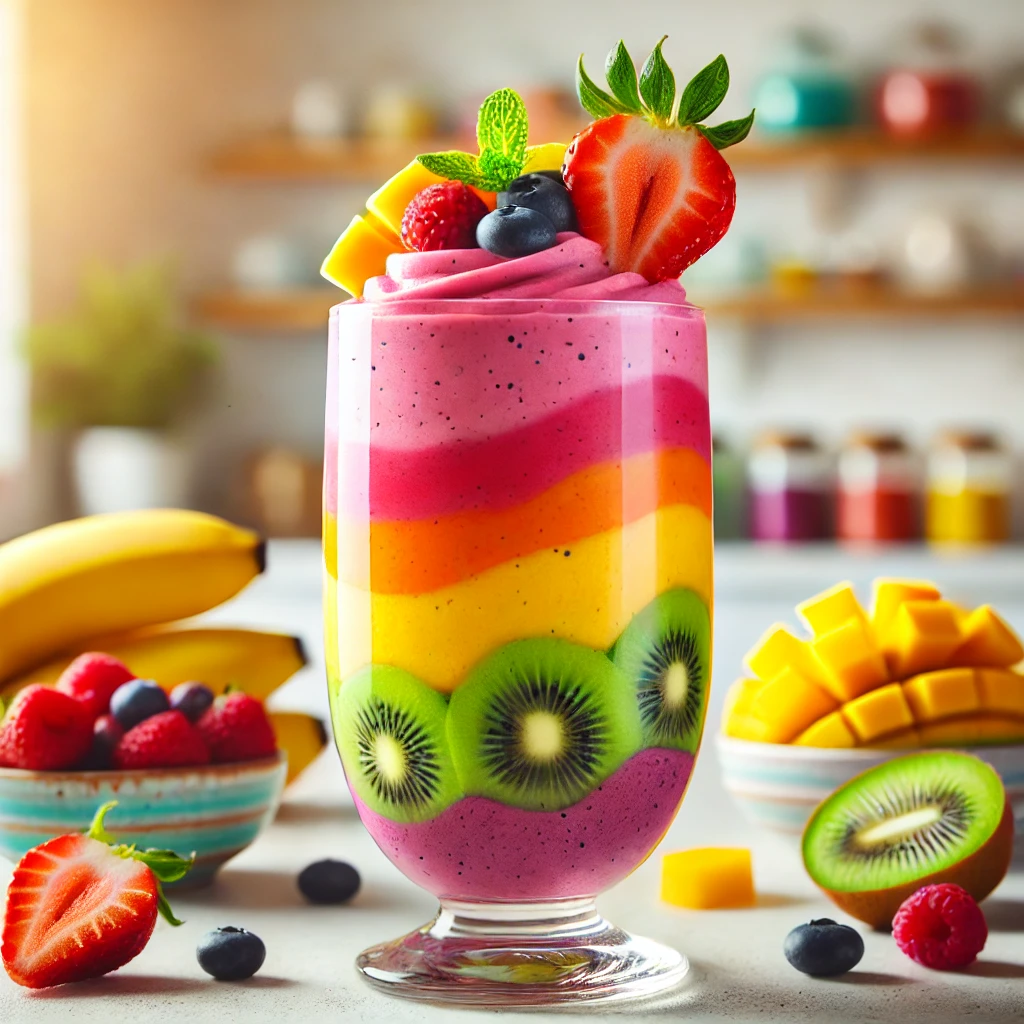


- **Gaussian Distributions: These are your basic smoothie flavors** Each has its own unique **taste (mean) and consistency (variance)**.
- **Mixing Coefficients**: These are like your **measuring cups**. They determine how much of each flavor you'll pour into the blender.
- What you get is a complex, **multi-flavored smoothie (your GMM)** that can represent a **wide variety of taste profiles (data distributions)**.
### Tasting (Data Fitting)
- Now, **customers (data points)** come in and taste your smoothie:
- Some **might strongly taste one flavor** (high probability of belonging to one Gaussian).
- Others **might detect a mix of flavors** (probabilities spread across multiple Gaussians).
### The Secret Recipe (EM Algorithm)
- To perfect your smoothie, you use a special technique **(Expectation-Maximization)**:
- Expectation: Ask customers which **flavors they think they're tasting**.
- Maximization: **Adjust your recipe** based on their feedback.
- Repeat until your smoothie is just right!

### Now, we will take a look at some applications of GMM

### 1. Image Segmentation

- GMMs can be used to segment images based on pixel intensity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import data, color

# Load and preprocess the image
image = color.rgb2gray(data.astronaut()) # converts color to gray scale image
image = image / 255.0  # Normalize pixel values between [0, 1]
print(image.shape)

# Reshape the image for GMM
X = image.reshape(-1, 1)  #converts this into a 1-D array, by multiplying the two dimensions and flattening.
print(X.shape)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
segmented = gmm.predict(X)   #cluster the pixels based on the intensity.

# Reshape back to image dimensions
segmented_image = segmented.reshape(image.shape)
print(segmented_image.shape)

# Plot original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_image, cmap='viridis')
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

### 2. Anomaly Detection
- GMMs can detect anomalies by modeling normal data and identifying outliers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
normal_data = np.random.normal(loc=0.0, scale=1.0, size=(300, 2))
anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
data = np.vstack([normal_data, anomalies])       # stacks the two datasets together to make it a dataset of size (320, 2) 

# Fit GMM
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(normal_data)

# Compute probabilities and identify anomalies
probs = gmm.score_samples(data)
threshold = np.percentile(probs, 5)
anomalies_detected = data[probs < threshold]

# Plot data and detected anomalies
plt.scatter(data[:, 0], data[:, 1], label='Data', alpha=0.5)
plt.scatter(anomalies_detected[:, 0], anomalies_detected[:, 1], color='red', label='Anomalies')
plt.title('Anomaly Detection with GMM')
plt.legend()
plt.show()

In [ ]:
print(anomalies.shape)
print(normal_data.shape)
print(data.shape)

### 3. Customer Segmentation
- GMMs can segment customers based on purchasing behavior.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Simulate customer data (e.g., annual spending in two categories)
np.random.seed(42)
category_1 = np.random.normal(loc=5000, scale=1000, size=(100,))   #loc- mean of the distribution ; scale - std dev of the distribution
category_2 = np.random.normal(loc=3000, scale=500, size=(100,))
customer_data = np.column_stack((category_1, category_2))
print(category_1.shape)
print(category_2.shape)
print(customer_data.shape)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(customer_data)

# Plot customer segments
plt.scatter(customer_data[:, 0], customer_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation with GMM')
plt.xlabel('Spending in Category 1')
plt.ylabel('Spending in Category 2')
plt.show()